In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read the data set using read_csv

In [88]:
df = pd.read_csv('/content/student_scores.csv')

## Check the data points in the dataset

In [89]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [90]:
df.shape

(25, 2)

In [91]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##Visualize the data set

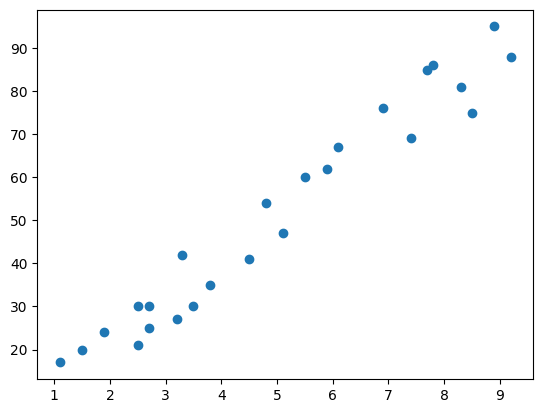

In [93]:
plt.scatter(df['Hours'], df['Scores'])
plt.show()

In [94]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [95]:
import seaborn as sns

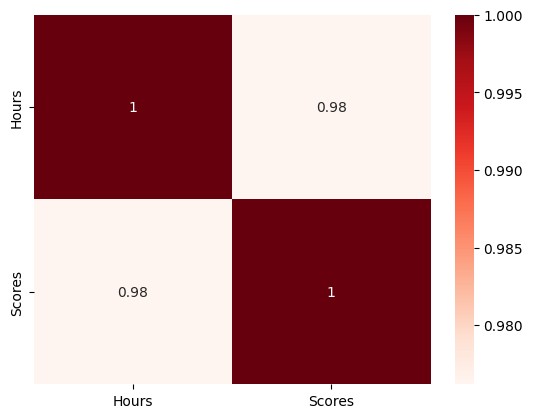

In [96]:
sns.heatmap(df[['Hours','Scores']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [97]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


## Simple Linear Regression

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
One variable, **denoted x** , is regarded as the **predictor, explanatory, or independent variable**.
The other variable, **denoted y**, is regarded as **the response, outcome, or dependent variable.**



In [102]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [109]:
print('X shape:', X.shape)
print('y shape:', y.shape)
print('X shape type:', type(X))
print('y shape type:', type(y))

X shape: (25, 1)
y shape: (25,)
X shape type: <class 'pandas.core.frame.DataFrame'>
y shape type: <class 'pandas.core.series.Series'>


In [104]:
#Wrong Approach 
X_wrong = df.iloc[:,-1]
y_wrong = df.iloc[:,-1]

In [108]:
print('X_wrong shape:', X_wrong.shape , type(X_wrong) )
print('y_wrong shape:', y_wrong.shape , type(y_wrong))

X_wrong shape: (25,) <class 'pandas.core.series.Series'>
y_wrong shape: (25,) <class 'pandas.core.series.Series'>


##Split the data into train and test

We could already feed our X and y data directly to our linear regression model, but if we use all of our data at once, how can we know if our results are any good? Just like in learning, what we will do, is use a part of the data to train our model and another part of it, to test it

This is easily achieved through the helper **train_test_split()** method, which accepts our X and y arrays (also works on DataFrames and splits a single DataFrame into training and testing sets), and a test_size.

train_test_split() helper method from from ***sklearn.model_selection import train_test_split***
  
test_size is the percentage of the overall data we'll be using for testing

 Some common train-test splits are  80/20 and 70/30.

 random_state = SEED = Some Number(42) = Splitting data into training/validation/test sets: random seeds ensure that the data is divided the same way every time the code is run



In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [58]:
print(X_train)

    Hours
9     2.7
13    3.3
1     5.1
22    3.8
5     1.5
2     3.2
12    4.5
15    8.9
3     8.5
4     3.5
20    2.7
17    1.9
21    4.8
18    6.1
24    7.8
7     5.5
10    7.7
14    1.1
19    7.4
6     9.2


In [59]:
print(y_train)

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64


##Training a Linear Regression Model

our train and test sets ready. Scikit-Learn has a various model types we can easily import and train

need to fit the line to our data, we will do that by using the **.fit()** method along with our X_train and y_train data

You can inspect the intercept and slope by printing the **regressor.intecept_**  and **regressor.coef_** attributes

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
regressor.intercept_

2.826892353899737

In [62]:
regressor.coef_

array([9.68207815])

In [84]:
print(regressor.coef_[0])

9.682078154455697


##Making Predictions

our own formula that calculates the value or  call on the **predict()** function

In [63]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [64]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[94.80663482]


In [67]:
score = regressor.predict([[9.5]])
print(score)

[94.80663482]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
y_pred = regressor.predict(X_test)

In [71]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_preds)

    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153


##Visualize the Actual Vs Predicted

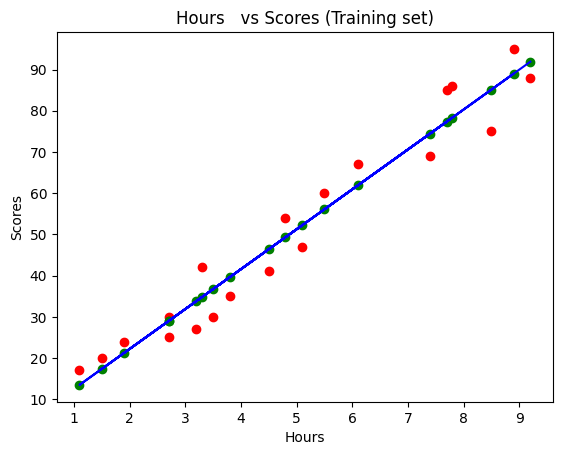

In [86]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.scatter(X_train, regressor.predict(X_train), color = 'green')
plt.title('Hours   vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

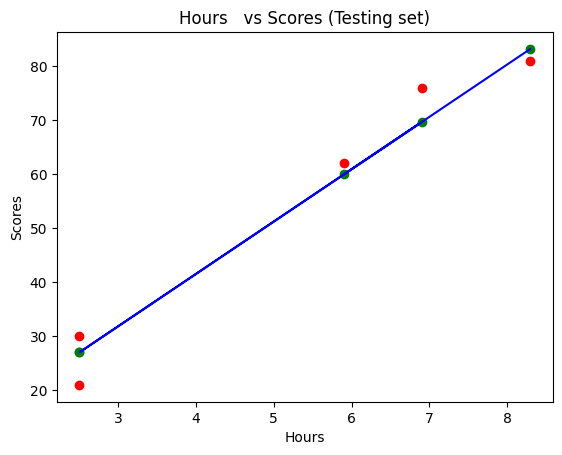

In [85]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.scatter(X_test, regressor.predict(X_test), color = 'green')
plt.title('Hours   vs Scores (Testing set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##Evaluating the Model


Using from sklearn.metrics import mean_absolute_error, mean_squared_error


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)